# DAY 6: Neural Networks for Regression

### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: July 30th, 2:00 pm Kigali Time

**First name**: _________________________________________________________


**Last name**: _____________

## Learning Goals:

1. review polynomial regression (with and without regularization)
2. train a neural network
    * adjust the learning rate appropriately
    * read trace plots of the loss function
3. regularize a neural network
4. compare polynomial regression with neural network regression

In [ ]:
# import necessary libraries

# For neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

# Non-neural network models and data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# Numerical computation and visualization
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

#### Auxiliary functions to generate and visualize data. 
**No need to read through!**

In [ ]:
def make_toy_data():
  '''
  make_toy_data generates synthetic data for regression.
  
  input: none
  output: 
    x_train - a numpy array of length 200 * 0.6
    x_test - a numpy array of length 200 * 0.4
    y_train - a numpy array of length 200 * 0.6
    y_test - a numpy array of length 200 * 0.4
    
  '''
  # set the number of samples to take for each toy dataset
  n_samples = 200
  # set the proportion of toy data to hold out for testing
  test_size = 0.4
  # set observation noise level
  sigma = 2.0

  # define a function
  f = lambda x: 10.0 * np.sin(np.sqrt(x * 100.0)) ** 2.0 + (100.0 * x) ** (2.0 / 3.0)

  # choose some points from the function - this is our toy dataset 
  x = np.random.permutation(np.linspace(0, 0.5, n_samples)).reshape(-1, 1)

  # add some noise to the funciton values
  y = f(x) + np.random.normal(0, sigma, size=x.shape)

  # create training and testing data from this set of points
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

  # sort training set by x value
  data = zip(x_train, y_train)
  data = np.array(sorted(data, key=lambda d: d[0]))
  x_train = data[:, 0]
  y_train = data[:, 1]

  # sort test set by x value
  data = zip(x_test, y_test)
  data = np.array(sorted(data, key=lambda d: d[0]))
  x_test = data[:, 0]
  y_test = data[:, 1]
  
  return x_train, x_test, y_train, y_test

### Let us generate some data for regression

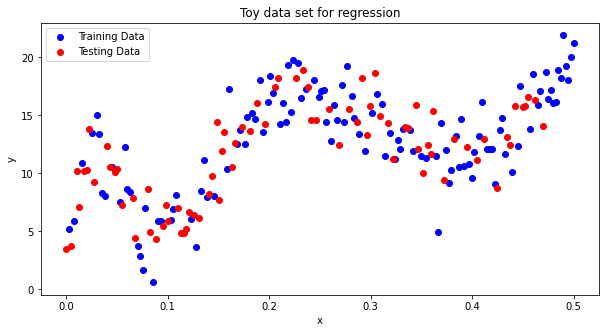

In [ ]:
# Generate toy data
x_train, x_test, y_train, y_test = make_toy_data()

# Plot the toy data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(x_train, y_train, color='blue', label='Training Data') # scatter plot the training data
ax.scatter(x_test, y_test, color='red', label='Testing Data') # scatter plot the testing data

ax.legend(loc='best') # add legend
ax.set(xlabel='x', ylabel='y', title='Toy data set for regression') # set title and axis labels
plt.show()

## 1. Review: Polynomial Regression

Let's train a polynomial regression model on this dataset.

**Exercise 1:** Train a polynomial of degree at least 50 on this data. Visualize your model, and evaluate your model's train and test MSE. How well does your model fit the data? Relate your answers to concept like overfitting/underfitting, bias/variance and generalization error.

In [ ]:
# Step 1: Define the polynomial features
degree = 50
features = PolynomialFeatures(degree)
x_train_poly = features.fit_transform(x_train)
x_test_poly = features.fit_transform(x_test)

# Step 2: Define the regression model
linear_regression = LinearRegression(fit_intercept=False)

# Step 3: Transform the training x's using the polynomial features, and then fit the regression model
linear_regression.fit(x_train_poly, y_train)

# Step 5: Predict on training data
y_train_pred = linear_regression.predict(x_train_poly)
# Stet 6: Compute train MSE
print('MSE on Training Data:', mean_squared_error(y_train, y_train_pred))

# Step 7: Predict on test data
y_test_pred = linear_regression.predict(x_test_poly)
# Stet 8: Compute test MSE
print('MSE on Testing Data: ', mean_squared_error(y_test, y_test_pred))

MSE on Training Data: 3.9660677620730582
MSE on Testing Data:  3.3552851234473087


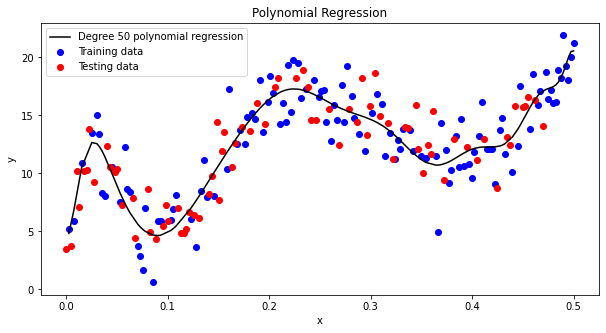

In [ ]:
# Steep 5: Plot the polynomial model against the data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train, y_train, color='blue', label='Training data')
ax.scatter(x_test, y_test, color='red', label='Testing data')
ax.plot(x_train, y_train_pred, color='black', label='Degree {} polynomial regression'.format(degree))
ax.legend()
ax.set(xlabel='x', ylabel='y', title='Polynomial Regression')
plt.show()

**Exercise 2:** Try different degrees for your polynomial model, which degree is the most appropriate and why? Relate your answers to concept like overfitting/underfitting, bias/variance and generalization error.

Now we will fit a regularized polynomial regression model to the data and investigage the effect of regularization on our model.


**Exercise 3:** Fit a degree 50 polynomial regression model with $\ell_2$-regularization on the training data (remember that $\ell_2$-regularized regression is called ***Ridge Regression*** and is implemented as `Ridge` by `sklearn`). Visualize your model and evaluate your model's train and test MSE.

Try different values for the regularization strength and choose one that is the most appropriate model. Justify your choice of the regularization strength by relating your answers to concept like overfitting/underfitting, bias/variance and generalization error.

In [ ]:
# Step 1: Define the polynomial features
degree = 50
features = PolynomialFeatures(degree)

# Step 2: Transform training and test input with PolynomialFeatures
x_train_poly = features.fit_transform(x_train)
x_test_poly = features.fit_transform(x_test)

# Step 3: Instantiate a Ridge regression model
# Hint: you may want to look at this for reference
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# COMPLETE
# ridge_regression = ...

# Step 4: Fit the regression model
# COMPLETE

# Step 5: Compute the train MSE
# COMPLETE
# y_train_mse = ...
# print('MSE on Training Data:', y_train_mse)

# Step 6: Compute the test MSE
# COMPLETE
# y_test_mse = ...
# print('MSE on Training Data:', y_test_mse)

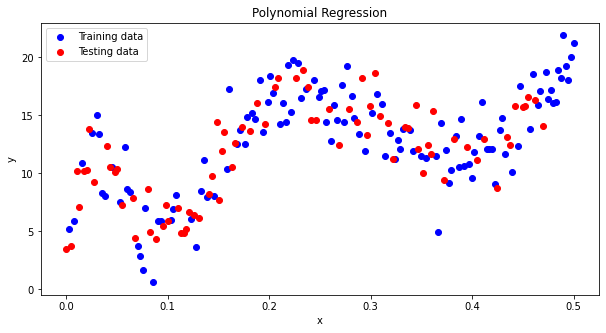

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# scatter plot the training data
ax.scatter(x_train, y_train, color='blue', label='Training data')
# scatter plot the test data
ax.scatter(x_test, y_test, color='red', label='Testing data')

# Step 7: Predict the labels on the training data using your model
# COMPLETE
# y_train_pred = ...
# ax.plot(x_train, y_train_pred, color='black', label='Degree {} ridge regression'.format(degree))

ax.legend(loc='best')
ax.set(xlabel='x', ylabel='y', title='Polynomial Regression')
plt.show()

**Exercise 4:** Compare your regularized polynomial model to the unregularized polynomial model with the best degree in Exercise 2. In general to prevent both underfitting and overfitting, is it better to spend time choosing an appropriate polynomial degree for regression or is it better to use a high degree polynomial and choose a regularization strenght? Support your answers with concepts you've learned in class.

---

# 2. Neural Network Regression

Now, we will fit a neural network regression model to the same data and compare it with our polynomial model.

**Exercise 5**: Train a neural network model with your choice of architecture on the training data. Visualize the traceplot to make sure that gradient descent has converged (try changing the learning rate to change convergence behavior)!

Visualize your model and compute the train/test MSE. Find the best architecture for this data (you must try different number of layers and different number of hidden nodes in each layer!). Justify your choice of the regularization strength by relating your answers to concept like overfitting/underfitting, bias/variance and generalization error.

In [ ]:
# Step 1: Create a base neural network to which we will add layers
neural_network = Sequential()

# Step 2: Add layers to the neural network
hidden_nodes = 5  # the number of hidden nodes in each layer
neural_network.add(Dense(hidden_nodes, input_dim=x_train.shape[-1], activation='tanh')) # Input layer
neural_network.add(Dense(hidden_nodes, activation='tanh'))                              # Hidden layer
neural_network.add(Dense(y_train.shape[-1], activation='linear'))                           # Output layer

# Step 3: Create an optimizer, which will be used to train our neural network
learning_rate = 0.0005  # controls the step-size the optimizer takes at each iteration of the training
optimizer = SGD(lr=learning_rate)
neural_network.compile(loss='mse', optimizer=optimizer)

# Step 4: Trainn the neural network
batch_size = 100     # number of randomly-selected training points for which the optimizer will step
epochs = 1000  # number of training iterations
history = neural_network.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=epochs, verbose=0)

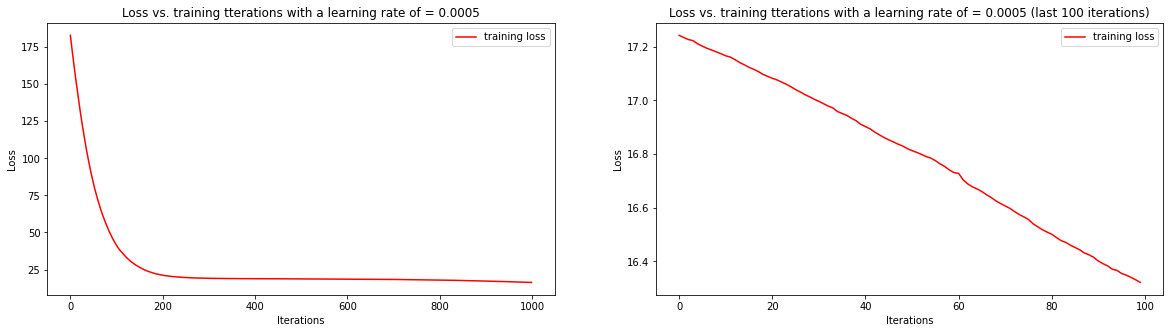

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Step 5: Visualize the training trajectory
ax[0].plot(np.array(history.history['loss']), color='red', label='training loss')

ax[0].legend()
ax[0].set_title('Loss vs. training tterations with a learning rate of = {}'.format(learning_rate))
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

# Ste 6: Visualize the training trajectory for the last 100 iterations
ax[1].plot(np.array(history.history['loss'])[-100:], color='red', label='training loss')

ax[1].legend()
ax[1].set_title('Loss vs. training tterations with a learning rate of = {} (last 100 iterations)'.format(learning_rate))
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
# Step 7: Predict label on training set
y_train_pred = neural_network.predict(x_train)

# Step 8: Compute MSE on training set 
print('MSE on Training Data:', mean_squared_error(y_train, y_train_pred))

# Step 9: Predict label on test set
y_test_pred = neural_network.predict(x_test)

# Step 10: Compute MSE on test set 
print('MSE on Testing Data: ', mean_squared_error(y_test, y_test_pred))

MSE on Training Data: 16.313413569696138
MSE on Testing Data:  13.73502724835151


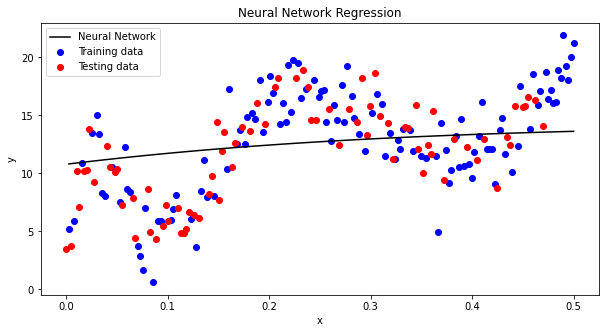

In [ ]:
# Step 11: Plot the neural network against the data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(x_train, y_train, color='blue', label='Training data') # scatter plot the training data
ax.scatter(x_test, y_test, color='red', label='Testing data') # scatter plot test data

ax.plot(x_train, y_train_pred, color='black', label='Neural Network') # plot the train predictions

ax.legend()
ax.set(xlabel='x', ylabel='y', title='Neural Network Regression')
plt.show()

Now, we will investigate the effect of regularization on our neural network model.

**Exercise 6:** Train a neural network model with $\ell_2$-regularization on the training data. Visualize your model and evaluate your model's train and test MSE.

Try different values for the regularization penalty (by changing the value in the regularizer `l2(0.01)`). Choose an appropriate regularization strength for your model.

In [ ]:
# Step 1: Create a base neural network and regularizes
neural_network = Sequential()
reg = l2(0.01) # change the strength of the regularizer

# Step 2: Add layers to the neural network
num_hidden_nodes = 10  # the number of hidden nodes in each layer
neural_network.add(Dense(num_hidden_nodes, input_dim=x_train.shape[-1], activation='tanh', kernel_regularizer=reg, bias_regularizer=reg))
neural_network.add(Dense(num_hidden_nodes, activation='tanh', kernel_regularizer=reg, bias_regularizer=reg))
neural_network.add(Dense(y_train.shape[-1], activation='linear', kernel_regularizer=reg, bias_regularizer=reg)) 

# Step 3: Create an optimizer, which will be used to train our neural network
learning_rate = 0.0005  # controls the step-size the optimizer takes at each iteration of the training
optimizer = SGD(lr=learning_rate)
neural_network.compile(loss='mse', optimizer=optimizer)

# Step 4: Train the neural network
batch_sz = 100     # number of randomly-selected training points for which the optimizer will step
num_epochs = 1000  # number of training iterations
history = neural_network.fit(x_train, y_train, batch_size=batch_sz, shuffle=True, epochs=num_epochs, verbose=0)

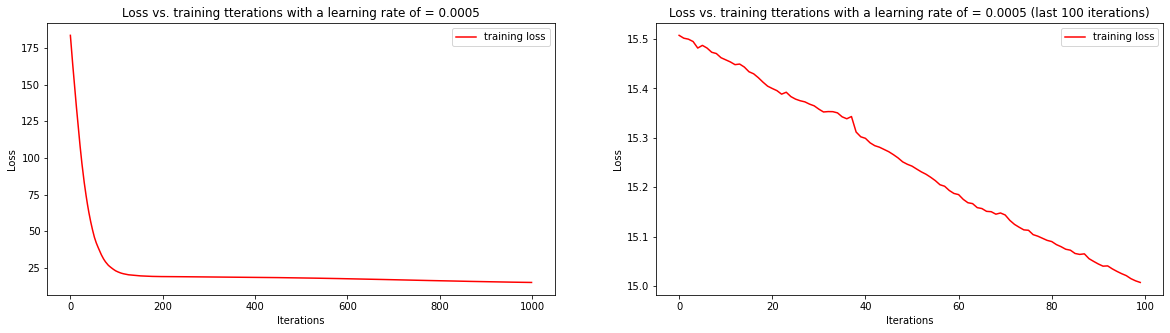

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Step 5: Visualize the training trajectory
ax[0].plot(np.array(history.history['loss']), color='red', label='training loss')

ax[0].legend()
ax[0].set_title('Loss vs. training tterations with a learning rate of = {}'.format(learning_rate))
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

# Ste 6: Visualize the training trajectory for the last 100 iterations
ax[1].plot(np.array(history.history['loss'])[-100:], color='red', label='training loss')

ax[1].legend()
ax[1].set_title('Loss vs. training tterations with a learning rate of = {} (last 100 iterations)'.format(learning_rate))
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
# Step 5: Evaluate the model
y_train_pred = neural_network.predict(x_train)
print('MSE on Training Data:', mean_squared_error(y_train, y_train_pred))

y_test_pred = neural_network.predict(x_test)
print('MSE on Testing Data: ', mean_squared_error(y_test, y_test_pred))

MSE on Training Data: 14.49965551699063
MSE on Testing Data:  11.632460670435782


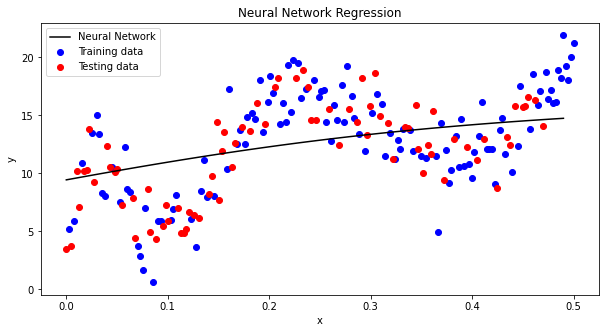

In [ ]:
# Step 7: Make predictions on a range of x-values for visualization
x_range = np.arange(0, 0.5, 0.01).reshape(-1, 1)
y_range_pred = neural_network.predict(x_range)

# Step 8: Plot the polynomial model against the data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train, y_train, color='blue', label='Training data')
ax.scatter(x_test, y_test, color='red', label='Testing data')
ax.plot(x_range, y_range_pred, color='black', label='Neural Network')
ax.legend()
ax.set(xlabel='x', ylabel='y', title='Neural Network Regression')
plt.show()


**Exercise 7:** Compare your regularized neural network with the regularized polynomial regression model to the one in Exercise 3. Does your model fit the data better? Why or why not?